In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, KFold
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML_Assignments/datasets/Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check for nulls
print(df.isnull().sum())

# Rename 'Genre' to 'Gender' for clarity
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Drop CustomerID as it’s not useful for clustering
df.drop("CustomerID", axis=1, inplace=True)

# Convert 'Gender' to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [6]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
#train test split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

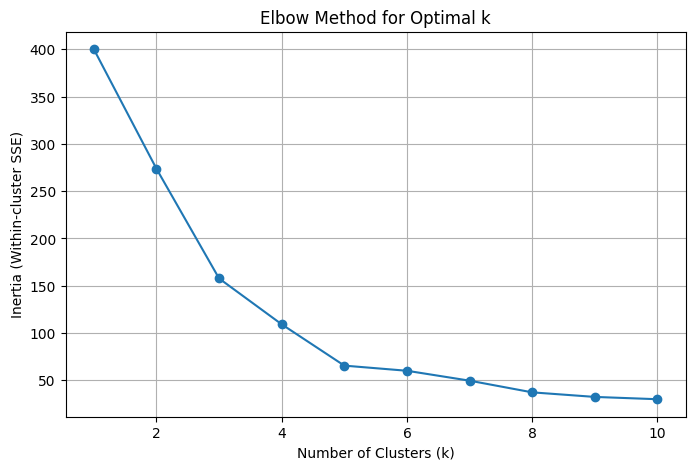

In [8]:
#elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

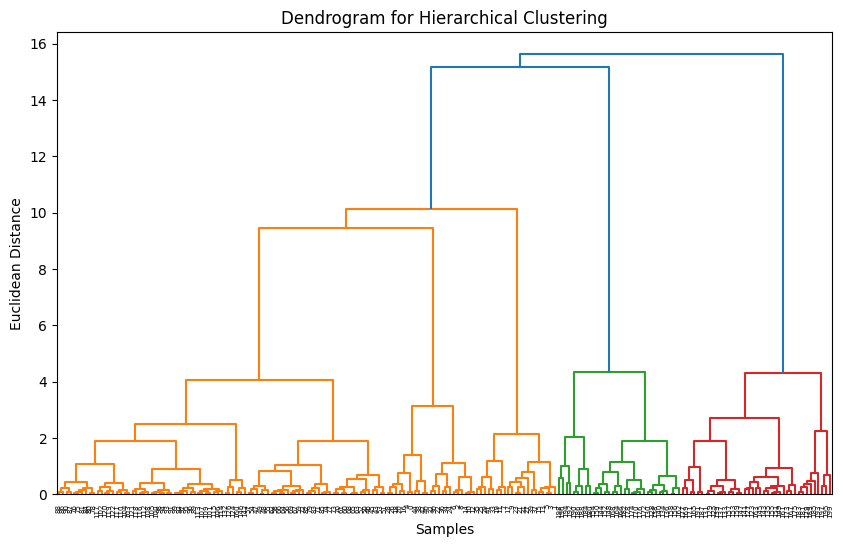

In [9]:
#dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [10]:
# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)


In [11]:
#eval before CV
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agglo_labels))

KMeans Silhouette Score: 0.5546571631111091
Agglomerative Silhouette Score: 0.5538089226688662


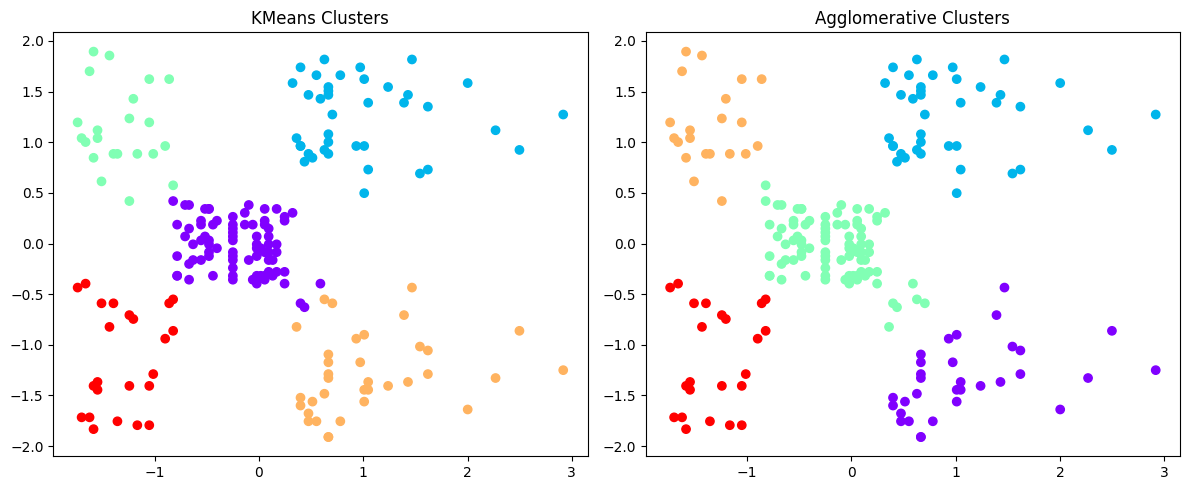

In [12]:
#plot clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title("KMeans Clusters")

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='rainbow')
plt.title("Agglomerative Clusters")

plt.tight_layout()
plt.show()

In [13]:
def cross_val_silhouette(model, X, folds=5):
    scores = []
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    for train_idx, test_idx in kf.split(X):
        X_fold = X[train_idx]
        labels = model.fit_predict(X_fold)
        score = silhouette_score(X_fold, labels)
        scores.append(score)
    return scores

# Cross-Validation for KMeans
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_cv_scores = cross_val_silhouette(kmeans_model, X_scaled)
print("KMeans CV Silhouette Scores:", kmeans_cv_scores)

# Cross-Validation for Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=5)
agglo_cv_scores = cross_val_silhouette(agglo_model, X_scaled)
print("Agglomerative CV Silhouette Scores:", agglo_cv_scores)

KMeans CV Silhouette Scores: [np.float64(0.5509842461121202), np.float64(0.45646553835327264), np.float64(0.5588737627697495), np.float64(0.5482315154161868), np.float64(0.5521327007013304)]
Agglomerative CV Silhouette Scores: [np.float64(0.5523700957479284), np.float64(0.556417227046893), np.float64(0.5558321811763726), np.float64(0.5196608040904769), np.float64(0.5434278937380126)]
